# Flight_price_implementation

In [441]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [442]:
df = pd.read_excel("Data_Train.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [443]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [444]:
# checking the null values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [445]:
# droping null values
df.dropna(inplace=True)

In [446]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Arrival time , Depature Time , Duration are in Date and Time need to seperate each individually

In [447]:
df['Arrival_hour'] = pd.to_datetime(df.Arrival_Time).dt.hour
df['Arrival_minutes'] = pd.to_datetime(df.Arrival_Time).dt.minute
df = df.drop(['Arrival_Time'],axis=1)

In [448]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Arrival_hour,Arrival_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,21,35


In [449]:
df['travelling_date'] = pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.day
df['travelling_month'] = pd.to_datetime(df.Date_of_Journey,format='%d/%m/%Y').dt.month
df = df.drop(['Date_of_Journey'],axis=1)

In [450]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Arrival_hour,Arrival_minutes,travelling_date,travelling_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,1,10,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,13,15,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,4,25,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,23,30,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,21,35,1,3


In [451]:
df['dep_hour'] = pd.to_datetime(df.Dep_Time).dt.hour
df['dep_min'] = pd.to_datetime(df.Dep_Time).dt.minute
df = df.drop(['Dep_Time'],axis=1)
df.head()



,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Arrival_hour,Arrival_minutes,travelling_date,travelling_month,dep_hour,dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,1,10,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,13,15,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,4,25,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,23,30,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,21,35,1,3,16,50


In [452]:
df['Duration'][0].split()

['2h', '50m']

In [453]:
a = list(df["Duration"])
# individually checking the hours and minutes and spliting 
for i in range(len(a)):
    if len(a[i].split()) != 2:   
        if "h" in a[i]:
            a[i] = a[i].strip() + " 0m"   # Adds 0 minute
        else:
            a[i] = "0h " + a[i]  

In [454]:
duration_hours = []
duration_mins = []
for i in range(len(a)):
    duration_hours.append(int(a[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(a[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [455]:
df['dur_hours'] = duration_hours
df['dur_min'] = duration_mins
df = df.drop(['Duration'],axis=1)

In [456]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Arrival_hour,Arrival_minutes,travelling_date,travelling_month,dep_hour,dep_min,dur_hours,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,1,10,24,3,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,13,15,1,5,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,4,25,9,6,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,23,30,12,5,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,21,35,1,3,16,50,4,45


In [457]:
import matplotlib.pyplot as plt
import seaborn as sns

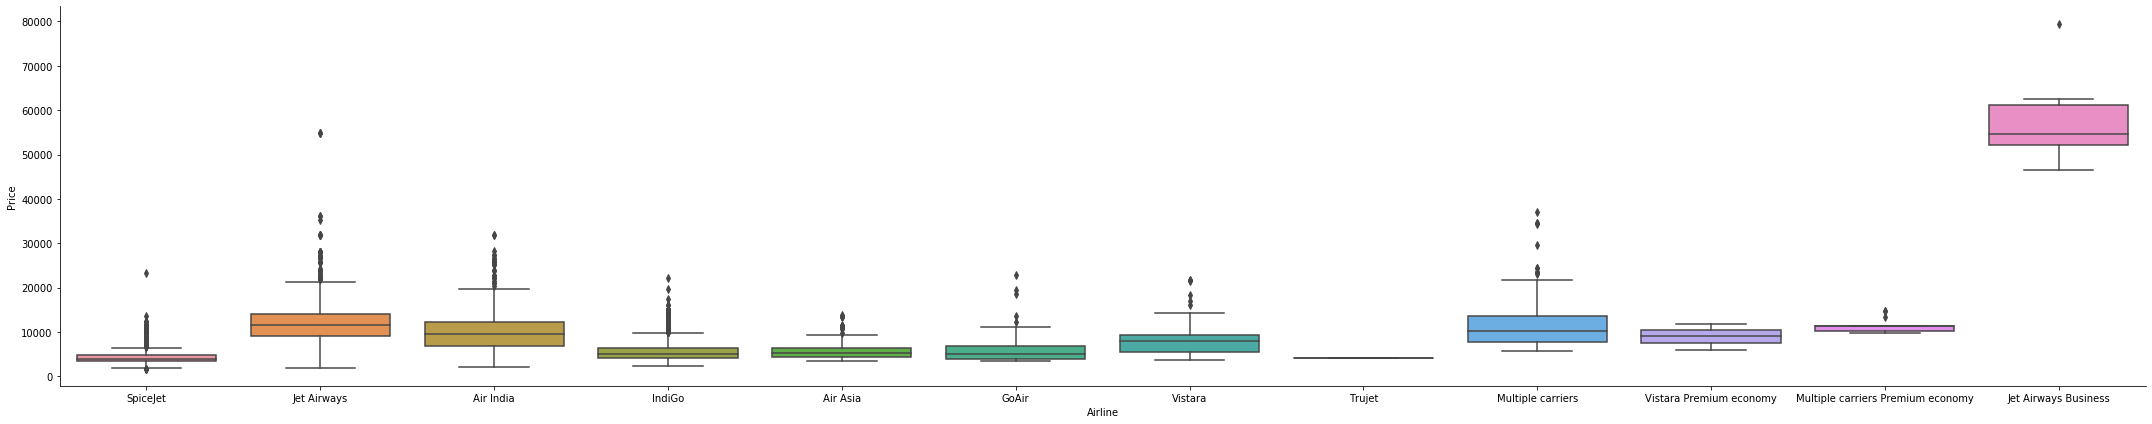

In [458]:
sns.catplot(x='Airline',y='Price',data = df.sort_values('Price',ascending=True),kind='box',height=6,aspect=5)

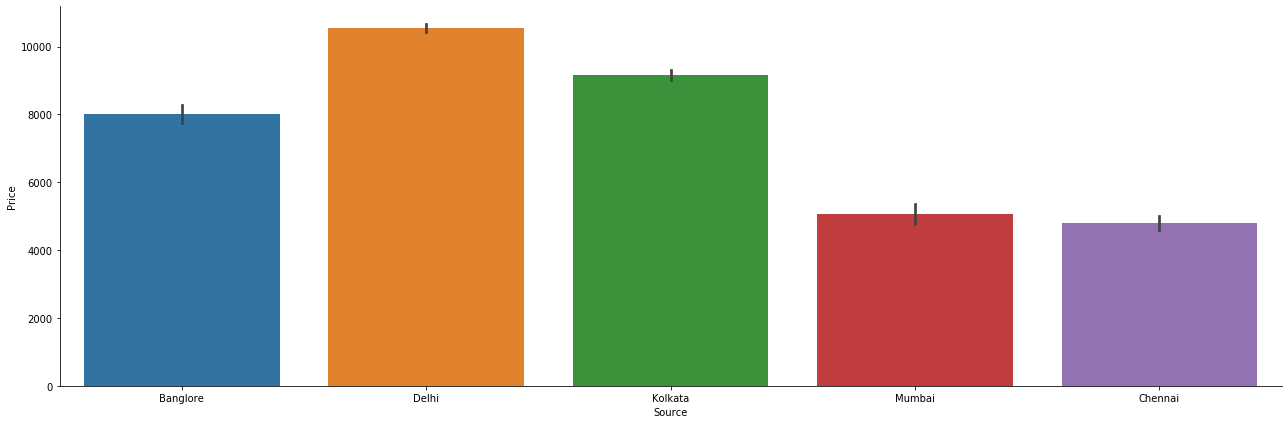

In [459]:
sns.catplot(y = "Price", x = "Source", data =df.sort_values("Price", ascending = False), kind="bar", height = 6, aspect = 3)
plt.show()

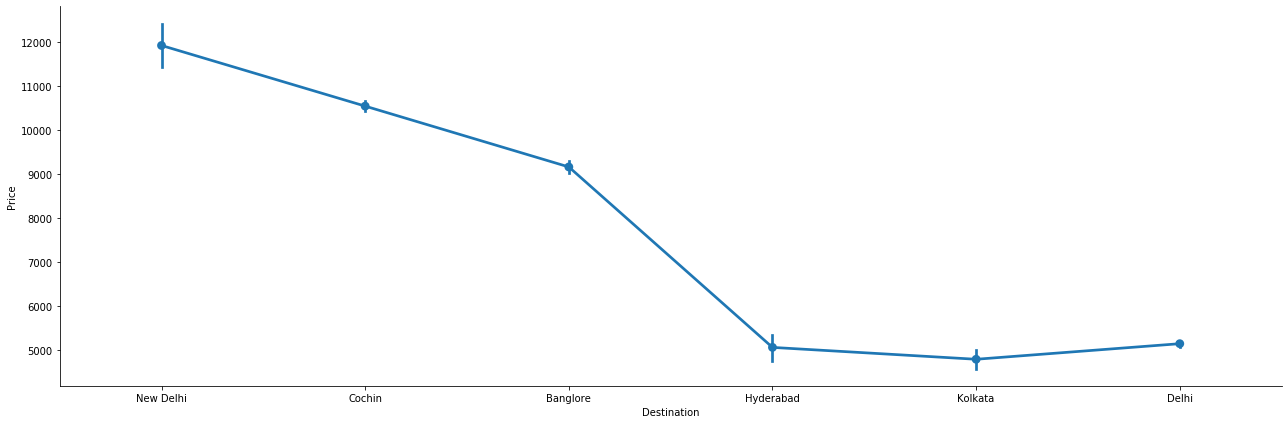

In [460]:
sns.catplot(y = "Price", x = "Destination", data =df.sort_values("Price", ascending = False), kind="point", height = 6, aspect = 3)
plt.show()

completed handling with time , Date , Minute applied concepts

In [461]:
# Handilng with Categorical Data

In [462]:
c = df.select_dtypes(object)

In [463]:
c

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info
...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info


In [464]:
c['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [465]:
Airline_dummy = pd.get_dummies(c['Airline'],drop_first=True)
Airline_dummy.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [466]:
c['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [467]:
Source_dummy = pd.get_dummies(c['Source'],drop_first=True)
Source_dummy.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [468]:
Destination_dummy = pd.get_dummies(c['Destination'],drop_first=True)
Destination_dummy.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


Additional Information has no perfect data 80% data get not has no information

Routes and Total_stops are getting related so we can drop routes feature

In [469]:
c.drop(['Route'],axis=1,inplace=True)

C:\Users\korla\Anaconda3\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


As we can see as the number of total stops increasing the cost decreasing


In [470]:
c['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [471]:
c['Total_Stops'].replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

C:\Users\korla\Anaconda3\lib\site-packages\pandas\core\series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [472]:
c = pd.concat([c,Airline_dummy,Destination_dummy,Source_dummy],axis=1)

In [473]:
c.drop(['Airline','Source','Destination','Additional_Info'],axis=1,inplace=True)

In [474]:
c.head()

,Total_Stops,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,...,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [475]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Arrival_hour,Arrival_minutes,travelling_date,travelling_month,dep_hour,dep_min,dur_hours,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,1,10,24,3,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,13,15,1,5,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,4,25,9,6,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,23,30,12,5,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,21,35,1,3,16,50,4,45


In [476]:


df.drop(['Airline','Source','Destination','Route','Total_Stops','Additional_Info'],axis=1,inplace=True)


In [477]:
df.head()

,Price,Arrival_hour,Arrival_minutes,travelling_date,travelling_month,dep_hour,dep_min,dur_hours,dur_min
0,3897,1,10,24,3,22,20,2,50
1,7662,13,15,1,5,5,50,7,25
2,13882,4,25,9,6,9,25,19,0
3,6218,23,30,12,5,18,5,5,25
4,13302,21,35,1,3,16,50,4,45


In [478]:
df1 = pd.concat([df,Airline_dummy,Source_dummy,Destination_dummy],axis=1)

In [479]:
df1.head()

,Price,Arrival_hour,Arrival_minutes,travelling_date,travelling_month,dep_hour,dep_min,dur_hours,dur_min,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,3897,1,10,24,3,22,20,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,7662,13,15,1,5,5,50,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,13882,4,25,9,6,9,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,6218,23,30,12,5,18,5,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,13302,21,35,1,3,16,50,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [480]:
df1['Total_drops'] = c['Total_Stops']

In [481]:
df1.head()

,Price,Arrival_hour,Arrival_minutes,travelling_date,travelling_month,dep_hour,dep_min,dur_hours,dur_min,Air India,...,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_drops
0,3897,1,10,24,3,22,20,2,50,0,...,0,0,0,0,0,0,0,0,1,0
1,7662,13,15,1,5,5,50,7,25,1,...,0,0,1,0,0,0,0,0,0,2
2,13882,4,25,9,6,9,25,19,0,0,...,0,1,0,0,1,0,0,0,0,2
3,6218,23,30,12,5,18,5,5,25,0,...,0,0,1,0,0,0,0,0,0,1
4,13302,21,35,1,3,16,50,4,45,0,...,0,0,0,0,0,0,0,0,1,1


# Test_Data

In [482]:
test_data = pd.read_excel("Test_set.xlsx")
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [483]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [484]:
# same applting above steps

In [485]:
print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)



Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

In [486]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


In [487]:
data_test.columns

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata',
       'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

In [488]:
df1.shape

(10682, 30)

In [489]:
df1.columns

Index(['Price', 'Arrival_hour', 'Arrival_minutes', 'travelling_date',
       'travelling_month', 'dep_hour', 'dep_min', 'dur_hours', 'dur_min',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi', 'Total_drops'],
      dtype='object')

In [490]:
X = df1.iloc[:,1:]
y = df1.Price

In [491]:
X.head()

,Arrival_hour,Arrival_minutes,travelling_date,travelling_month,dep_hour,dep_min,dur_hours,dur_min,Air India,GoAir,...,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_drops
0,1,10,24,3,22,20,2,50,0,0,...,0,0,0,0,0,0,0,0,1,0
1,13,15,1,5,5,50,7,25,1,0,...,0,0,1,0,0,0,0,0,0,2
2,4,25,9,6,9,25,19,0,0,0,...,0,1,0,0,1,0,0,0,0,2
3,23,30,12,5,18,5,5,25,0,0,...,0,0,1,0,0,0,0,0,0,1
4,21,35,1,3,16,50,4,45,0,0,...,0,0,0,0,0,0,0,0,1,1


In [492]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [494]:
df1.corr()

,Price,Arrival_hour,Arrival_minutes,travelling_date,travelling_month,dep_hour,dep_min,dur_hours,dur_min,Air India,...,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_drops
Price,1.000000,0.024244,-0.086155,-0.153774,-0.103643,0.006799,-0.024458,0.508778,-0.124855,0.050432,...,-0.179223,0.270676,0.009358,-0.230755,0.270676,-0.313417,-0.230755,-0.179223,0.189777,0.603897
Arrival_hour,0.024244,1.000000,-0.154363,-0.003245,-0.003927,0.005180,0.043122,0.055276,-0.118309,0.088872,...,-0.014795,-0.006790,0.054693,-0.033512,-0.006790,-0.030867,-0.033512,-0.014795,0.000366,0.038140
Arrival_minutes,-0.086155,-0.154363,1.000000,-0.017510,-0.100626,0.067911,-0.017597,-0.074450,0.151628,0.061231,...,-0.030493,-0.209882,0.118573,0.081196,-0.209882,0.095250,0.081196,-0.030493,0.021271,-0.106940
travelling_date,-0.153774,-0.003245,-0.017510,1.000000,-0.038359,0.002170,-0.008170,-0.022059,-0.008940,-0.032490,...,0.006611,0.100088,-0.060558,-0.014030,0.100088,0.002632,-0.014030,0.006611,-0.075254,-0.009451
travelling_month,-0.103643,-0.003927,-0.100626,-0.038359,1.000000,0.039127,-0.059267,0.016141,-0.040897,-0.045981,...,0.005650,0.139222,0.087177,-0.039352,0.139222,0.090490,-0.039352,0.005650,-0.453685,0.054383
dep_hour,0.006799,0.005180,0.067911,0.002170,0.039127,1.000000,-0.024745,0.002869,-0.023707,-0.012879,...,-0.014846,-0.118780,0.155471,-0.017292,-0.118780,0.009469,-0.017292,-0.014846,-0.022138,-0.061476
dep_min,-0.024458,0.043122,-0.017597,-0.008170,-0.059267,-0.024745,1.000000,-0.022104,0.092485,-0.045688,...,0.067110,-0.085534,-0.024238,0.037705,-0.085534,0.003200,0.037705,0.067110,0.107129,-0.002618
dur_hours,0.508778,0.055276,-0.074450,-0.022059,0.016141,0.002869,-0.022104,1.000000,-0.126468,0.261707,...,-0.186668,0.299819,0.123524,-0.233326,0.299819,-0.346192,-0.233326,-0.186668,0.004052,0.739916
dur_min,-0.124855,-0.118309,0.151628,-0.008940,-0.040897,-0.023707,0.092485,-0.126468,1.000000,-0.033427,...,-0.098823,-0.154126,0.013761,-0.018761,-0.154126,0.218207,-0.018761,-0.098823,0.079866,-0.136706
Air India,0.050432,0.088872,0.061231,-0.032490,-0.045981,-0.012879,-0.045688,0.261707,-0.033427,1.000000,...,-0.051068,0.001257,0.023606,0.022268,0.001257,-0.068370,0.022268,-0.051068,0.053072,0.271094


In [496]:
import seaborn as sns

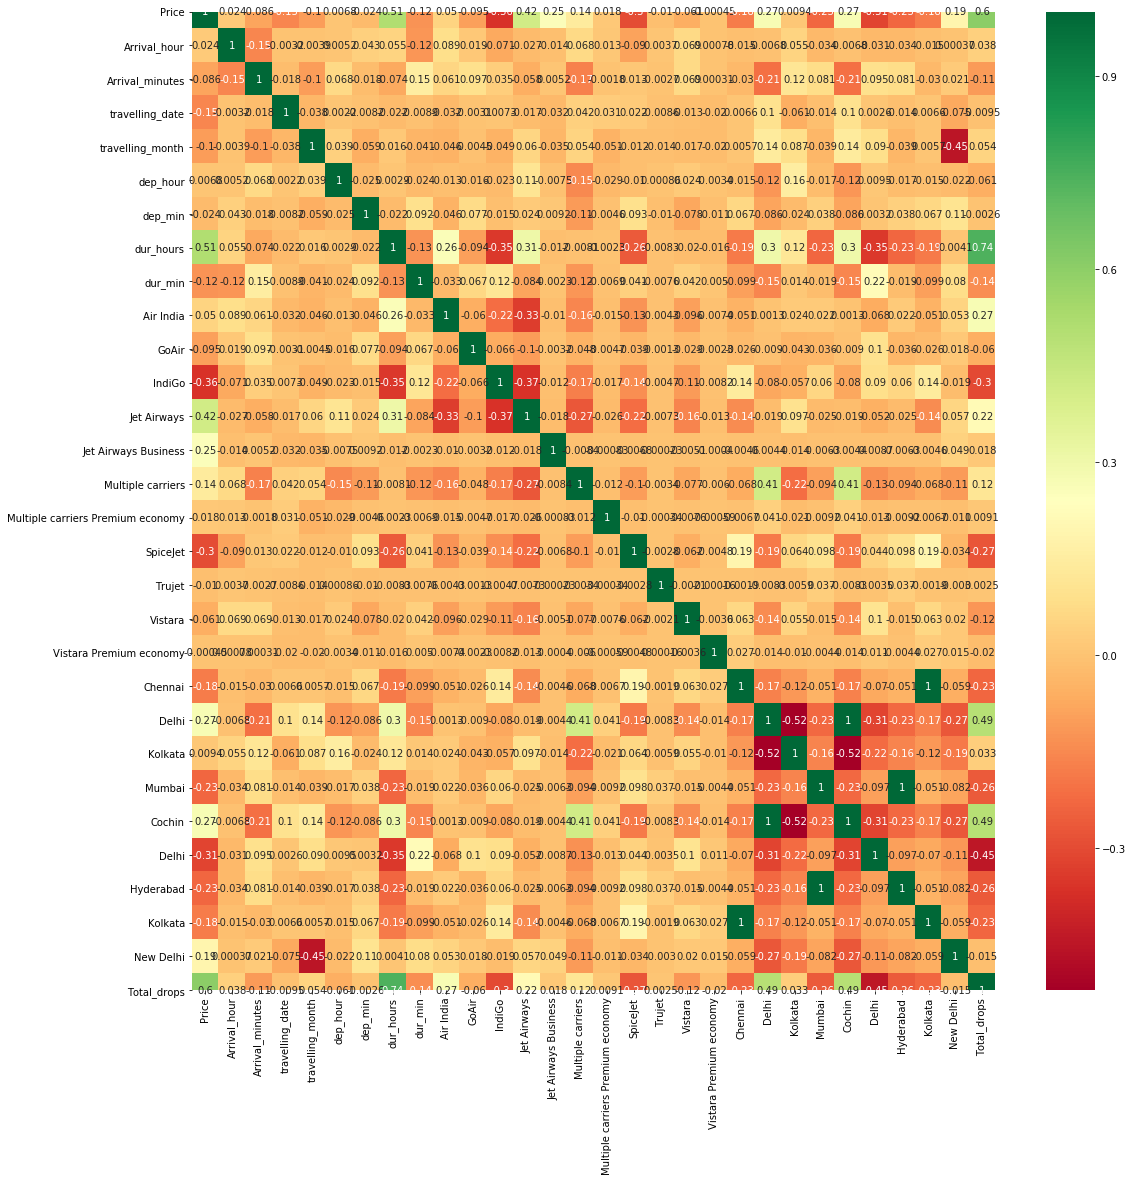

In [503]:
plt.figure(figsize=(18,18))
sns.heatmap(df1.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [504]:
X.shape

(10682, 29)

In [505]:
from sklearn.ensemble import ExtraTreesRegressor

In [507]:
sc = ExtraTreesRegressor()
sc.fit(X,y)

C:\Users\korla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [510]:
print(sc.feature_importances_)

[2.71519582e-02 1.84626049e-02 1.46884629e-01 4.76277489e-02
 2.48353981e-02 2.16911907e-02 1.53406565e-01 2.02504040e-02
 7.78670364e-03 1.93993154e-03 2.15936307e-02 1.33893058e-01
 6.61921750e-02 2.48626640e-02 7.99999141e-04 2.57658448e-03
 1.09379093e-04 4.60457813e-03 1.01159143e-04 7.61542865e-04
 3.21511999e-03 3.64663842e-03 8.49091823e-03 9.68455681e-03
 1.47092364e-02 3.97476926e-03 6.44964518e-04 2.49285277e-02
 2.05173364e-01]


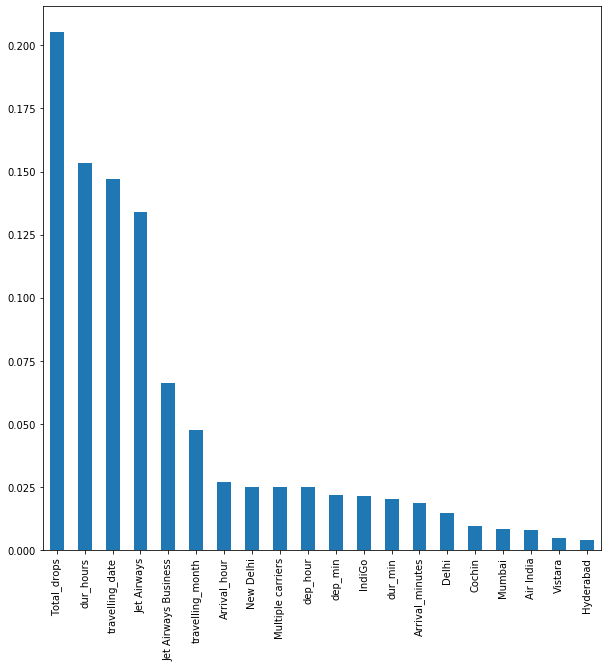

In [512]:
plt.figure(figsize=(10,10))
important_features = pd.Series(sc.feature_importances_,index=X.columns)
important_features.nlargest(20).plot(kind='bar')
plt.show()

In [513]:
X.shape

(10682, 29)

In [520]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [521]:
from sklearn.tree import DecisionTreeRegressor
reg  = DecisionTreeRegressor()
reg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [522]:
y_pred = reg.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7271178537044034

In [523]:
reg.score(X_train,y_train)


0.9692484150527354

In [524]:
reg.score(X_test,y_test)

0.7271178537044034

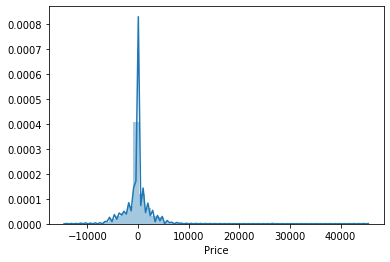

In [525]:
sns.distplot(y_test - y_pred)
plt.show()

looks like it is Normally distributed

In [527]:
from sklearn.ensemble import RandomForestRegressor
reg1 = RandomForestRegressor()
reg1.fit(X_train,y_train)


C:\Users\korla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [528]:
y_pred1 = reg1.predict(X_test)

In [529]:
reg1.score(X_train,y_train)


0.9458841135673408

In [530]:
reg1.score(X_test,y_test)

0.7813486472913417

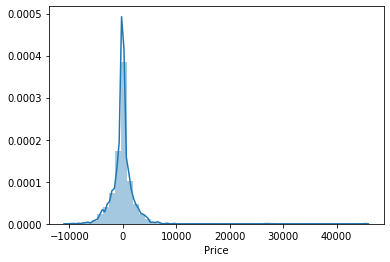

In [531]:
sns.distplot(y_test - y_pred1)
plt.show()

it is very perfectly Normally distributed when compared to Decision Forest 

## Hyperparameter Tuning

In [526]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [532]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [533]:
parameters = {
            'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
    
    
    
    
}

In [534]:
grid = RandomizedSearchCV(estimator=reg1,param_distributions=
parameters,scoring='neg_mean_squared_error',n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1
    )

In [535]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.9s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   9.1s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.4s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  7.5min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=10, n_jobs=None,
                                                   oob_score=False,
                                                   random_state=N...


In [536]:
grid.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=15,
                      min_weight_fraction_leaf=0.0, n_estimators=700,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [537]:
grid.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [539]:
reg2 = RandomForestRegressor(n_estimators=700,min_samples_split=15,min_samples_leaf=1,max_features='auto',max_depth=20)


In [540]:
reg2.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=15,
                      min_weight_fraction_leaf=0.0, n_estimators=700,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [541]:
predict = reg2.predict(X_test)

In [543]:
r2_score(y_test,predict)

0.8126197110318792

In [544]:
y_train_pred = reg2.predict(X_train)

In [545]:
r2_score(y_train,y_train_pred)

0.8959488533081627

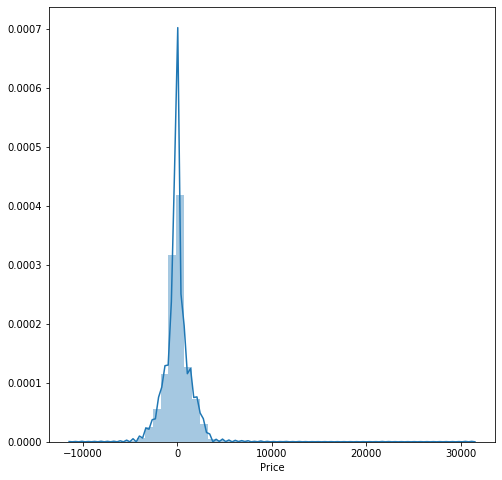

In [547]:
plt.figure(figsize=(8,8))
sns.distplot(y_train - y_train_pred)
plt.show()

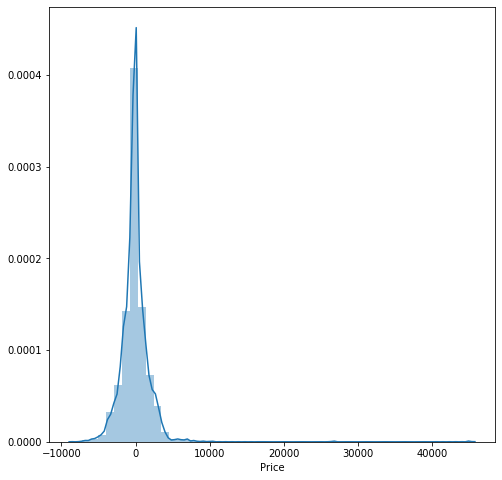

In [548]:
plt.figure(figsize=(8,8))
sns.distplot(y_test - predict)
plt.show()